![](../img/banner_day2.png)

<br>

# 2일차 실습(1) - 나이브 베이즈(Naive bayes)와 서포트 벡터 머신(SVM)

<br>
<br>
<div align='right'>강사 성민석</div>
<div align='right'>고려대학교 인공지능학과 박사과정</div>
<div align='right'>(minsuksung@korea.ac.kr)</div>

> <font color='red'><b>WARNING</b></font>: 본 컨텐츠는 **[저작권법 제25조 제2항](https://glaw.scourt.go.kr/wsjo/lawod/sjo192.do?contId=2135829&jomunNo=25)** 에 의해 강의 목적으로 이용한 저작물이 포함되어 있습니다.  
> 해당 자료를 제작자의 동의없이 <font color='red'><b>외부에 임의로 공개 및 수정하는 것을 금지</b></font>하며 이를 위반하는 경우 저작권 침해로서 관련법에 따라 처벌될 수 있으니 주의해주시기 바랍니다.

<h1>목차<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#탐색적-데이터-분석" data-toc-modified-id="탐색적-데이터-분석-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>탐색적 데이터 분석</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#피처-엔지니어링" data-toc-modified-id="피처-엔지니어링-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>피처 엔지니어링</a></span></li><li><span><a href="#모델링" data-toc-modified-id="모델링-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>모델링</a></span></li><li><span><a href="#하이퍼파라미터-튜닝" data-toc-modified-id="하이퍼파라미터-튜닝-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>하이퍼파라미터 튜닝</a></span></li><li><span><a href="#성능-평가" data-toc-modified-id="성능-평가-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>성능 평가</a></span></li><li><span><a href="#참고자료" data-toc-modified-id="참고자료-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>참고자료</a></span></li></ul></div>

![](../img/pipeline.png)

In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings(action='ignore')

## 데이터 불러오기
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

![](https://camo.githubusercontent.com/d2367f028498f84a8e11edd66faad675045d19b413d7dbaf44ac822853e69671/68747470733a2f2f6d69726f2e6d656469756d2e636f6d2f6d61782f313030302f312a486835336d4f4634587934654f526a4c696c4b4f77412e706e67)

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris_dataset = load_iris()

In [5]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
X = pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names'])
y = pd.DataFrame(iris_dataset['target'], columns=['target'])

In [12]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 탐색적 데이터 분석
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

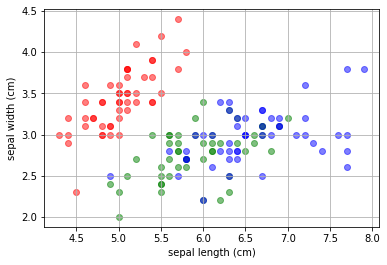

In [14]:
colors = ['r','g','b']
for idx, row in X[['sepal length (cm)','sepal width (cm)']].iterrows():
    plt.scatter(row['sepal length (cm)'],
                row['sepal width (cm)'],
                color=colors[int(y.iloc[idx])], alpha=0.5)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.grid(True)
plt.show()

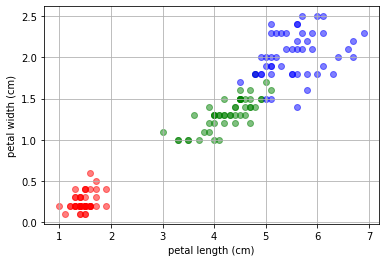

In [15]:
colors = ['r','g','b']
for idx, row in X[['petal length (cm)','petal width (cm)']].iterrows():
    plt.scatter(row['petal length (cm)'],
                row['petal width (cm)'],
                color=colors[int(y.iloc[idx])], alpha=0.5)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)
plt.show()

## 데이터 전처리
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [16]:
import missingno as msno

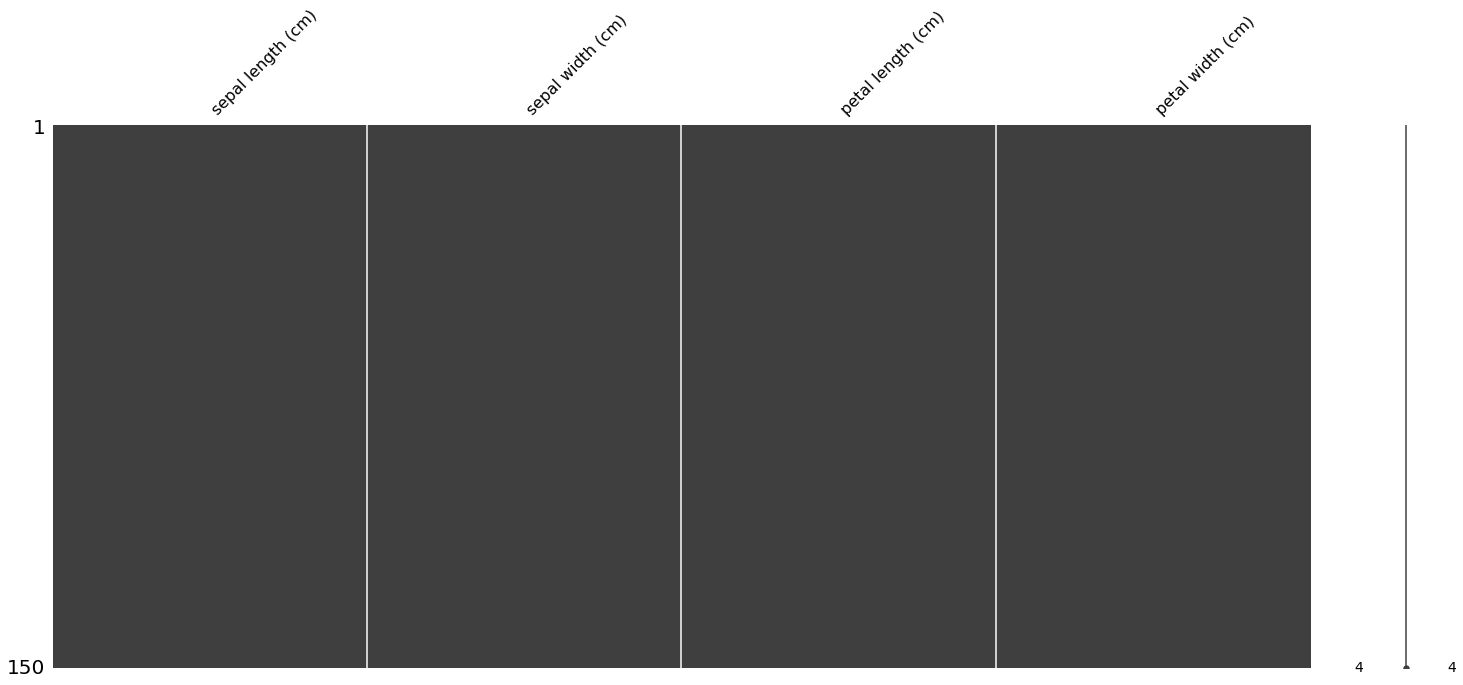

In [17]:
msno.matrix(X)
plt.show()

## 피처 엔지니어링
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [36]:
X_train.shape, X_valid.shape

((120, 6), (30, 6))

In [37]:
y_train.shape, y_valid.shape

((120, 1), (30, 1))

In [20]:
X_train['sepal/petal length(ratio)'] = X_train['sepal length (cm)'] / X_train['petal length (cm)']
X_valid['sepal/petal length(ratio)'] = X_valid['sepal length (cm)'] / X_valid['petal length (cm)']

In [21]:
X_train['sepal/petal width(ratio)'] = X_train['sepal width (cm)'] / X_train['petal width (cm)']
X_valid['sepal/petal width(ratio)'] = X_valid['sepal width (cm)'] / X_valid['petal width (cm)']

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_valid = mms.transform(X_valid)

## 모델링
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
model  = GaussianNB()
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

1.0

In [26]:
model = SVC(C=1.0, kernel='rbf', degree=3, max_iter=-1)
model.fit(X_train, y_train)
model.score(X_valid, y_valid)

1.0

## 하이퍼파라미터 튜닝
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [28]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],
    'degree': [1, 10, 100],
}

In [31]:
from sklearn.model_selection import KFold

kf = KFold(
    random_state=42,
    n_splits=5,
    shuffle=True,
)

In [32]:
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=kf,
    n_jobs=-1,
    verbose=2
)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1.0, 10.0, 100.0], 'degree': [1, 10, 100]},
             verbose=2)

In [35]:
grid_search.best_params_

{'C': 10.0, 'degree': 1}

In [39]:
grid_search.cv_results_

{'mean_fit_time': array([0.00351686, 0.00352917, 0.00294781, 0.00223317, 0.00240846,
        0.00227523, 0.00217295, 0.00224643, 0.00232668, 0.00227537,
        0.00204172, 0.00202503]),
 'std_fit_time': array([1.55876120e-04, 1.47021168e-04, 4.60051937e-04, 5.32540196e-04,
        1.38336401e-04, 7.35783067e-05, 2.60973199e-04, 3.16126472e-04,
        1.70972980e-04, 2.29206630e-04, 3.67040601e-04, 2.59089004e-04]),
 'mean_score_time': array([0.00120182, 0.0012126 , 0.00094557, 0.00069623, 0.00095186,
        0.00087152, 0.0007978 , 0.0008039 , 0.00084839, 0.0008163 ,
        0.00069242, 0.00074744]),
 'std_score_time': array([7.14146071e-05, 5.82610326e-05, 1.69996493e-04, 1.81725350e-04,
        7.15701600e-05, 5.03357128e-05, 1.14045792e-04, 1.35968709e-04,
        4.07048598e-05, 9.41264231e-05, 1.50636881e-04, 9.74865553e-05]),
 'param_C': masked_array(data=[0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0, 100.0,
                    100.0, 100.0],
              mask=[False, False,

In [40]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003517,0.000156,0.001202,0.000071,0.1,1,"{'C': 0.1, 'degree': 1}",1.000000,0.875000,0.833333,0.833333,0.958333,0.900000,0.067700,10
1,0.003529,0.000147,0.001213,0.000058,0.1,10,"{'C': 0.1, 'degree': 10}",1.000000,0.875000,0.833333,0.833333,0.958333,0.900000,0.067700,10
2,0.002948,0.000460,0.000946,0.000170,0.1,100,"{'C': 0.1, 'degree': 100}",1.000000,0.875000,0.833333,0.833333,0.958333,0.900000,0.067700,10
3,0.002233,0.000533,0.000696,0.000182,1.0,1,"{'C': 1.0, 'degree': 1}",0.916667,1.000000,0.958333,0.875000,1.000000,0.950000,0.048591,4
4,0.002408,0.000138,0.000952,0.000072,1.0,10,"{'C': 1.0, 'degree': 10}",0.916667,1.000000,0.958333,0.875000,1.000000,0.950000,0.048591,4
5,0.002275,0.000074,0.000872,0.000050,1.0,100,"{'C': 1.0, 'degree': 100}",0.916667,1.000000,0.958333,0.875000,1.000000,0.950000,0.048591,4
6,0.002173,0.000261,0.000798,0.000114,10.0,1,"{'C': 10.0, 'degree': 1}",0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,1
7,0.002246,0.000316,0.000804,0.000136,10.0,10,"{'C': 10.0, 'degree': 10}",0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,1
8,0.002327,0.000171,0.000848,0.000041,10.0,100,"{'C': 10.0, 'degree': 100}",0.916667,1.000000,0.958333,0.916667,1.000000,0.958333,0.037268,1
9,0.002275,0.000229,0.000816,0.000094,100.0,1,"{'C': 100.0, 'degree': 1}",0.916667,0.958333,0.958333,0.916667,1.000000,0.950000,0.031180,4


## 성능 평가
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

In [27]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 참고자료
<hr style="height:5px;border:none;color:#132e4f;background-color:#132e4f;"/>

- 

<br>

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 모든 자료의 저작권은 성민석에 있으며 제작자의 동의없이 외부로의 무단 복제, 배포 및 전송을 절대로 불허합니다.

<b>Copyright ⓒ 2022. Minsuk Sung. All rights reserved.</b>
</span>

<br>